In [172]:
# !pip install -r "requirements.txt"
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [173]:
from dotenv import load_dotenv
import warnings
from langgraph.graph import StateGraph , END , START
from langgraph.checkpoint.memory import MemorySaver
import generate_sql_query
from global_state import AgentState
warnings.filterwarnings("ignore")
load_dotenv()


True

In [174]:
memory = MemorySaver()

In [175]:
config = {"configurable":{"thread_id":1}}

In [176]:
workflow = StateGraph(AgentState)

workflow.add_node("get_initial_details",generate_sql_query.get_initial_details)
workflow.add_node("get_inital_necessary_tables",generate_sql_query.get_inital_necessary_tables)
workflow.add_node("rephrase_user_query",generate_sql_query.rephrase_user_query)
workflow.add_node("get_final_required_tables",generate_sql_query.get_final_required_tables)

workflow.add_edge(START,"get_initial_details")
workflow.add_edge("get_initial_details","get_inital_necessary_tables")
workflow.add_edge("get_inital_necessary_tables","rephrase_user_query")
workflow.add_edge("rephrase_user_query","get_final_required_tables")
workflow.add_edge("get_final_required_tables",END)

In [177]:
agent = workflow.compile(checkpointer=memory)

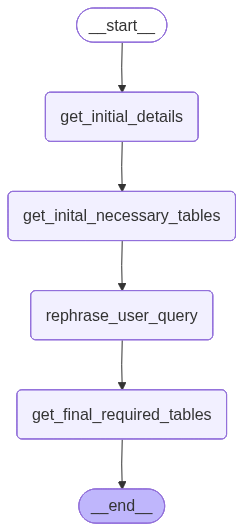

In [178]:
agent

In [179]:
st = {
    "db_name" : "Northwinds",
    "user_query" : "what was the total sales on date 1996-07-10 after discount?",
    "dataset_description" : "",
    "initial_necessary_table_details" : [],
    "all_table_details" : [],
    "final_necessary_table_details":[],
    "rephrased_query":"",
    "top_k":4,
    "initial_top_k":10
}

In [180]:
st = agent.invoke(input=st,config=config)

[Document(metadata={'total_rows': 2155, 'foreign_keys': '[{"columns": ["OrderID"], "referred_table": "Orders", "referred_columns": ["OrderID"]}, {"columns": ["ProductID"], "referred_table": "Products", "referred_columns": ["ProductID"]}]', 'table_name': 'Order Details', 'primary_key': '["OrderID", "ProductID"]', 'indexes': '[{"name": "OrderID", "columns": ["OrderID"], "unique": false}, {"name": "OrdersOrder_Details", "columns": ["OrderID"], "unique": false}, {"name": "ProductID", "columns": ["ProductID"], "unique": false}, {"name": "ProductsOrder_Details", "columns": ["ProductID"], "unique": false}]', 'columns': '[{"name": "OrderID", "type": "INTEGER", "nullable": false, "default": null, "autoincrement": false}, {"name": "ProductID", "type": "INTEGER", "nullable": false, "default": null, "autoincrement": false}, {"name": "UnitPrice", "type": "MONEY", "nullable": false, "default": "((0))", "autoincrement": false}, {"name": "Quantity", "type": "SMALLINT", "nullable": false, "default": "(

KeyError: 'text'

In [ ]:
st

In [ ]:
st = agent.invoke(input=st,config=config)

In [ ]:
st